In [91]:
import pandas as pd
import glob

In [176]:
dfs = []
for file in glob.glob('data/jsonl/3167-sha-2.jsonl'): #data/dataset-normalized-5000-with-imports/*.jsonl
    print(file)
    data = pd.read_json(file, lines=True)
    dfs.append(data)

df = pd.concat(dfs, ignore_index=True)
del data

data/jsonl/3167-sha-2.jsonl


In [177]:
df['repository'].nunique()

3167

## why not 3167 repositores for 3k files? # 
```
find data/dataset-normalized-5000-with-imports -iname "*.jsonl" | wc -l

find data/dataset-normalized-5000-with-imports -iname "*.*.jsonl" | awk -F'/' '{print $3}' | sort -d > 3000-repos-jsonl
```

```python
import os
with open("3000-repos-df", "w") as f:
    for org_repo in df.repository.sort_values().unique():
        org, repo = os.path.split(org_repo)
        f.write(f"{org}_{repo}.jsonl")
        f.write("\n")
```

In [178]:
df

,repository,size,sha,content,filepath,license
0,0ad/0ad,2509,51c1894ca7887b51dbee60994adb161ac77b2948f32ee7...,,libraries/source/cxxtest-4.4/python/python3/cx...,
1,0ad/0ad,2225,50ecf3c0377cc81322dc8cce8fc63350bc3a4fd056e360...,,source/tools/fontbuilder2/FontLoader.py,
2,0ad/0ad,1784,d2b38e70785f94c7d66b149f35cbf8c1ce850b3e70ac7c...,,libraries/source/cxxtest-4.4/python/setup.py,
3,0ad/0ad,549,3f13c62677566db455114db13ea9e138ef44c446433564...,,libraries/source/cxxtest-4.4/build_tools/SCons...,
4,0ad/0ad,0,e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b93...,,source/tools/i18n/extractors/__init__.py,
...,...,...,...,...,...,...
269892,zzzeek/sqlalchemy,16327,4c150d2ae898d68e70c39c4c284ffdd75cb2658ade7095...,,lib/sqlalchemy/orm/instrumentation.py,
269893,zzzeek/sqlalchemy,26501,903a0a76c46c78f42c67c429b69ed93b204e914d416319...,,test/engine/test_reconnect.py,
269894,zzzeek/sqlalchemy,0,e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b93...,,test/dialect/mysql/__init__.py,
269895,zzzeek/sqlalchemy,375,50aba9ba30fce98ac7692739a0d4271c8604316f7e0d76...,,examples/space_invaders/__init__.py,


In [179]:
df[df['size'] < 1*1024*1024].sha.count()

269871

In [180]:
df.sha.nunique()

216871

In [95]:
#df.groupby('repository').size().sort_values().plot.bar()

<AxesSubplot:>

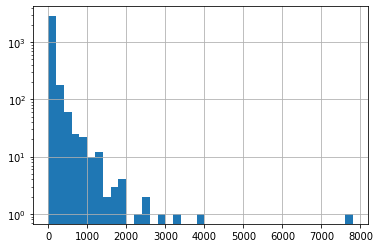

In [181]:
# number of files per-repo
df.groupby('repository').size().hist(bins=range(0, 8000, 200), log=True)

In [182]:
df.groupby('repository').size().sort_values() #.max()


repository
embulk/embulk                       1
PolymerLabs/lit-html                1
Polymer/lit-html                    1
Polymer/lit-element                 1
widdix/aws-cf-templates             1
                                 ... 
getsentry/sentry                 2534
gabrielfalcao/lettuce            2928
catboost/catboost                3380
home-assistant/home-assistant    3866
AppScale/appscale                7725
Length: 3167, dtype: int64

<AxesSubplot:>

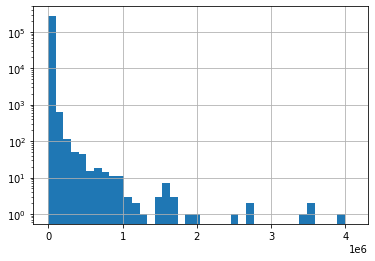

In [183]:
# file size
df['size'].hist(bins=range(0, 4*1024*1024, 100*1024), log=True)

In [184]:
df['size'].max()

3925548

In [185]:
df[df.sha != ""]['size'].max()

1047352

<AxesSubplot:>

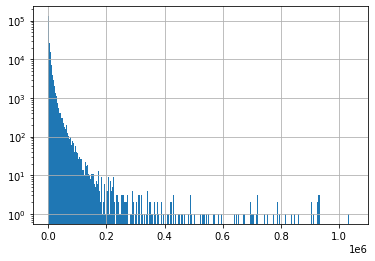

In [186]:
df[df.sha != ""]['size'].hist(bins=range(0, 1024*1024, 2*1024), log=True)

In [187]:
df[df['size'] > 1*1024*1024]

,repository,size,sha,content,filepath,license
17197,DonJayamanne/pythonVSCode,1708882,,,data/get-pip.py,
18108,Ewenwan/MVision,1594471,,,MXnet/self_lear_mxnet/get-pip.py,
18746,Gerapy/Gerapy,1594471,,,Deploy_Python3/roles/supervisor/files/get-pip.py,
23640,IronLanguages/main,2030145,,,Languages/IronPython/Tests/stress/bigimport1_t...,
28997,Microsoft/vscode-python,1708882,,,data/get-pip.py,
59688,ambv/black,1472551,,,profiling/mix_huge.py,
62754,ansible/ansible-container,1594471,,,container/docker/files/get-pip.py,
65672,apache/hive,1588323,,,standalone-metastore/metastore-common/src/gen/...,
99744,daviddrysdale/python-phonenumbers,1297805,,,python/phonenumbers/geodata/locale.py,
122462,fxsjy/jieba,2700685,,,jieba/posseg/prob_emit.py,
